# 아이리스 KNN 시각화 예제

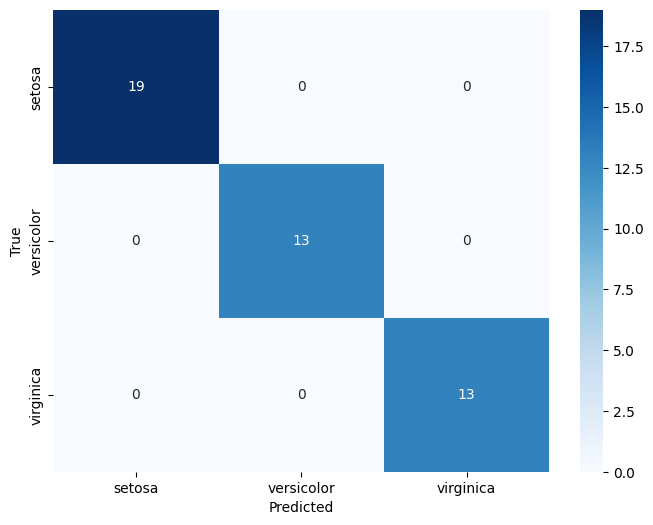

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA  # 차원 축소를 위해 PCA를 사용

# 데이터셋 로드
iris = datasets.load_iris()
X = iris.data
y = iris.target

# 훈련 세트와 테스트 세트로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# KNN 모델 생성 및 훈련
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# 예측
predictions = knn.predict(X_test)

# 혼동 행렬 시각화
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()



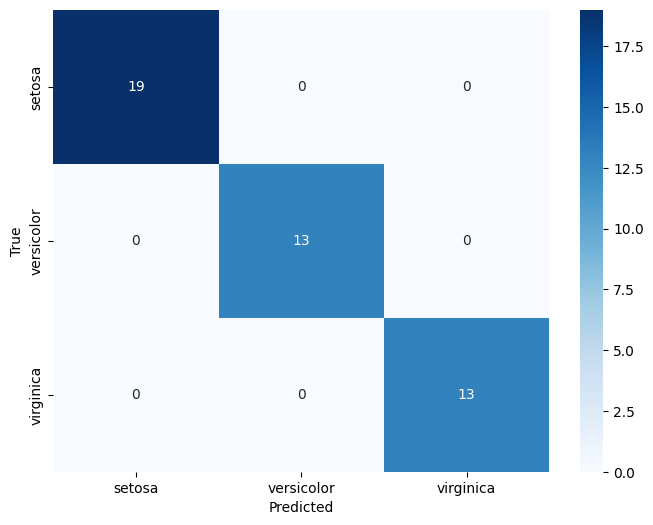

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Accuracy: 100.00%


<ipython-input-2-15a2ce2bb0f2>:62: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_reduced[idx, 0], X_reduced[idx, 1], c=color, label=iris.target_names[i],


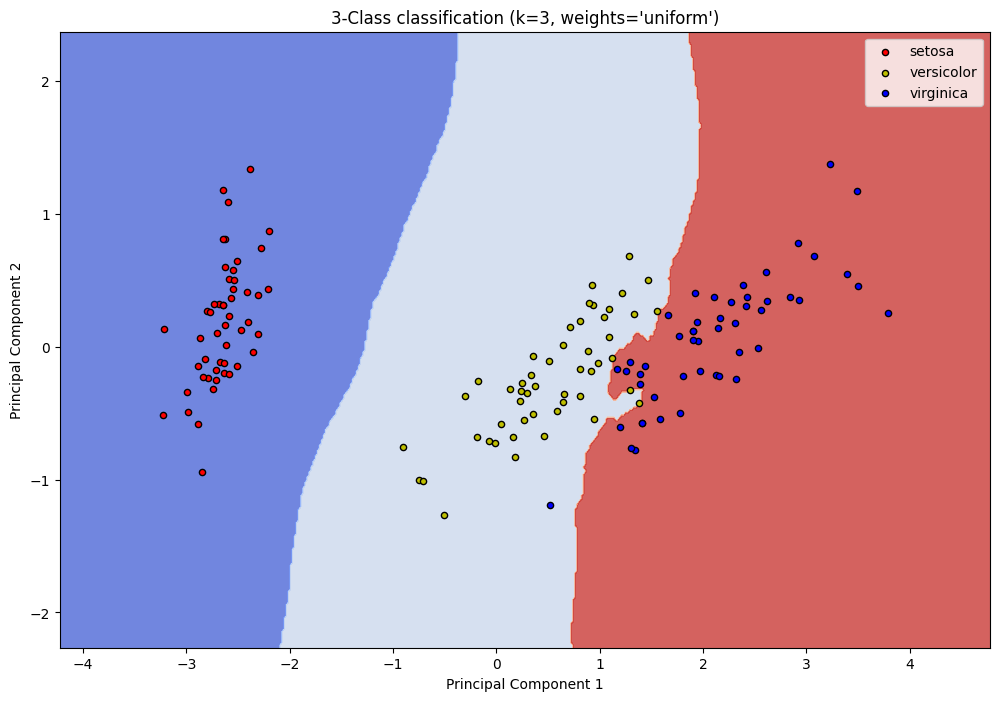

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA  # 차원 축소를 위해 PCA를 사용

# 데이터셋 로드
iris = datasets.load_iris()
X = iris.data
y = iris.target

# 훈련 세트와 테스트 세트로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# KNN 모델 생성 및 훈련
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# 예측
predictions = knn.predict(X_test)

# 혼동 행렬 시각화
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# 분류 보고서 출력
print(classification_report(y_test, predictions))

# 정확도 출력
accuracy = knn.score(X_test, y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")

# PCA를 사용하여 데이터를 2D로 축소 (시각화를 위해)
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# 2D로 축소된 전체 데이터셋에 대해 KNN 적용
knn.fit(X_reduced, y)

# 결정 경계 시각화
h = .02  # 메쉬 사이즈
x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

# 결과를 컬러 플롯으로 표시
Z = Z.reshape(xx.shape)
plt.figure(figsize=(12,8))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# 원본 데이터를 플롯에 표시
for i, color in zip(range(3), "ryb"):
    idx = np.where(y == i)
    plt.scatter(X_reduced[idx, 0], X_reduced[idx, 1], c=color, label=iris.target_names[i],
                cmap=plt.cm.coolwarm, edgecolor='black', s=20)

plt.title("3-Class classification (k=3, weights='uniform')")
plt.legend()
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


# 아이리스 K-means 시각화 예제

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


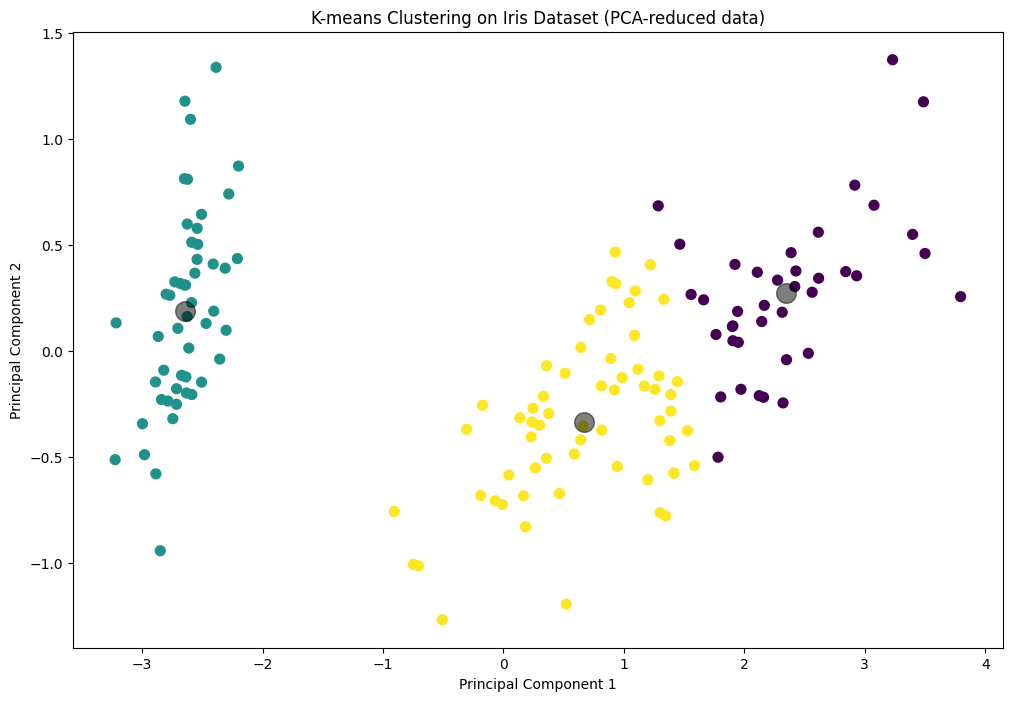

In [3]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np

# 데이터셋 로드
iris = datasets.load_iris()
X = iris.data
y = iris.target

# PCA를 사용하여 데이터를 2D로 축소 (시각화를 위해)
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# KMeans 클러스터링 모델 생성 및 훈련
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_reduced)

# 클러스터링 결과 레이블
y_kmeans = kmeans.predict(X_reduced)

# 클러스터 중심 시각화
centers = kmeans.cluster_centers_

# 클러스터링 결과 시각화
plt.figure(figsize=(12, 8))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_kmeans, s=50, cmap='viridis')

# 클러스터 중심 표시
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

# 제목 및 레이블 추가
plt.title('K-means Clustering on Iris Dataset (PCA-reduced data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# 결과 출력
plt.show()


# elbow method

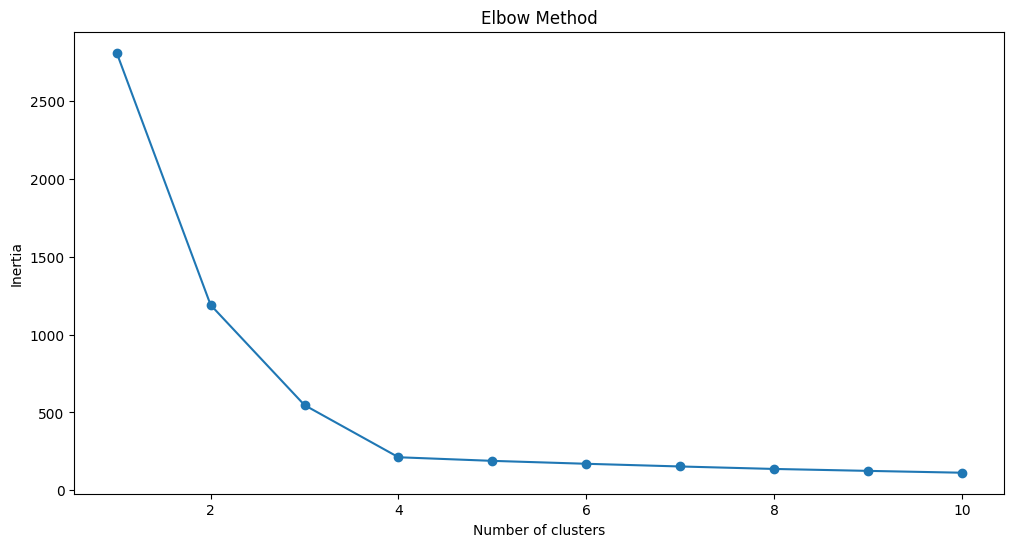

In [4]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# 임의의 데이터 생성
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# 클러스터 수에 따른 inertia 값을 저장할 리스트
inertias = []

# 1개에서 10개의 클러스터를 사용할 때까지의 KMeans 모델을 생성하고 inertia 계산
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# Elbow curve 시각화
plt.figure(figsize=(12, 6))
plt.plot(range(1, 11), inertias, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


# 아이리스 결정트리 시각화 예제


Test set accuracy: 1.00


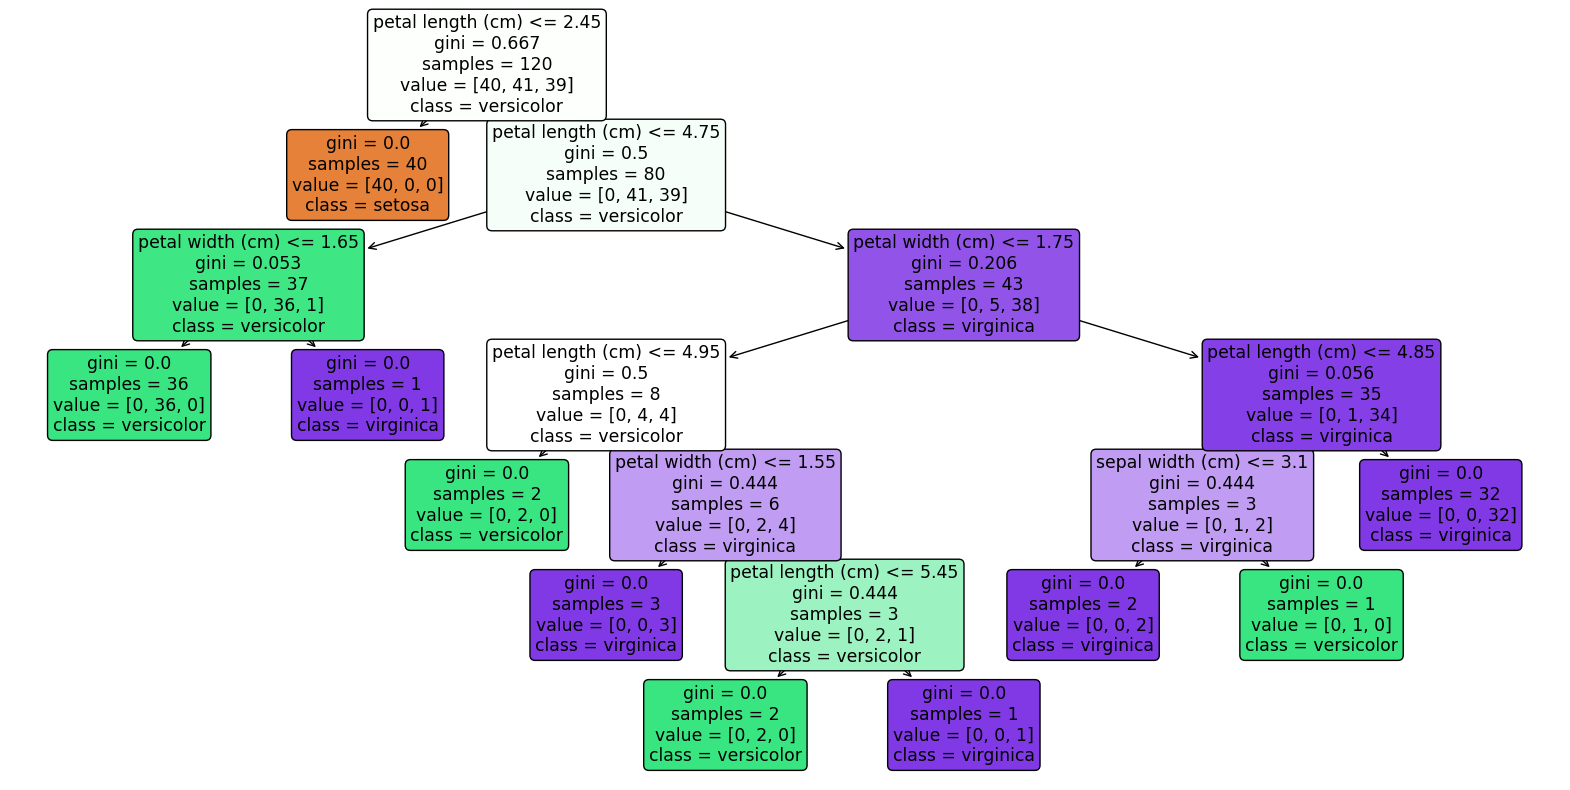

In [5]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

# 붓꽃 데이터셋 로드
iris = load_iris()
X, y = iris.data, iris.target

# 데이터셋을 훈련 세트와 테스트 세트로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 의사결정트리 모델 생성 및 훈련
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# 테스트 데이터에 대한 모델 정확도 출력
accuracy = decision_tree.score(X_test, y_test)
print(f"Test set accuracy: {accuracy:.2f}")

# 의사결정트리 시각화
plt.figure(figsize=(20,10))
plot_tree(decision_tree, filled=True, feature_names=iris.feature_names, class_names=iris.target_names, rounded=True)
plt.show()


# 필기분석 KNN 시각화 예제


              precision    recall  f1-score   support

           0       0.99      1.00      0.99        82
           1       0.97      1.00      0.98        89
           2       1.00      1.00      1.00        83
           3       0.99      0.95      0.97        93
           4       0.99      1.00      0.99        93
           5       0.98      0.96      0.97        99
           6       0.99      0.98      0.98        98
           7       0.95      1.00      0.97        87
           8       0.95      0.94      0.95        83
           9       0.96      0.93      0.95        92

    accuracy                           0.98       899
   macro avg       0.98      0.98      0.98       899
weighted avg       0.98      0.98      0.98       899



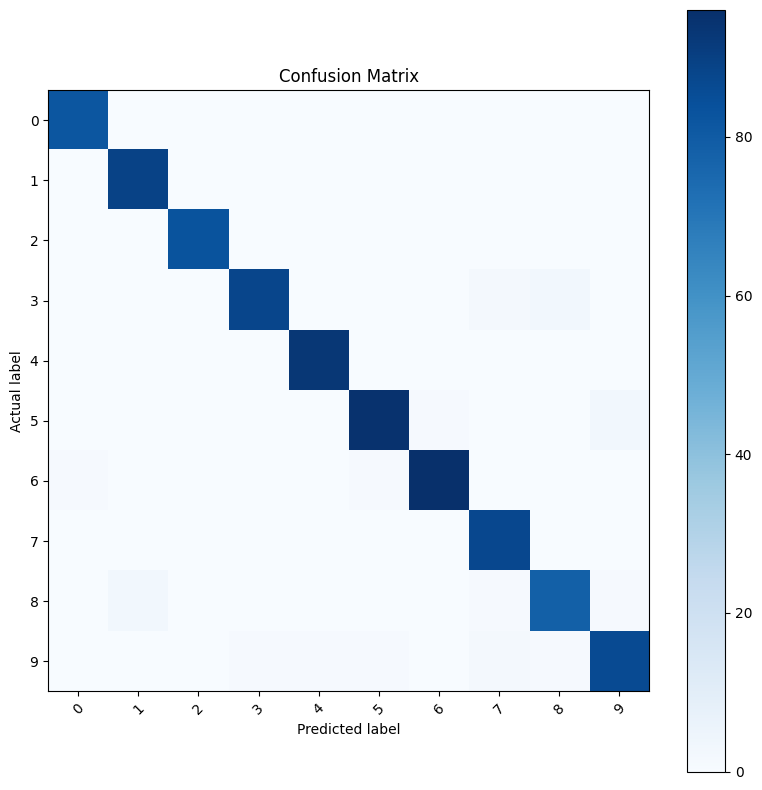

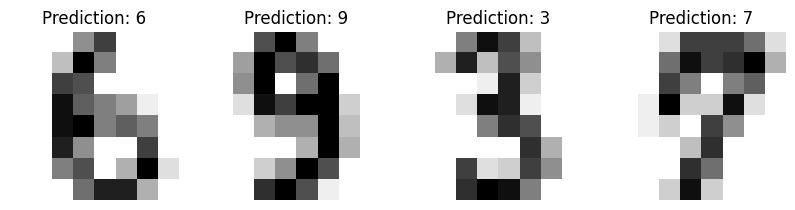

In [18]:
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

# MNIST 데이터셋 로드
digits = datasets.load_digits()

# 데이터셋의 이미지와 레이블 분할
X = digits.data
y = digits.target

# 데이터를 훈련 세트와 테스트 세트로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# KNN 모델 생성 및 훈련
# 여기에 코드 작성 #################################################

knn_MNIST = KNeighborsClassifier(n_neighbors=3)
knn_MNIST.fit(X_train, y_train)

####################################################################

# 테스트 데이터에 대한 예측
y_pred = knn.predict(X_test)

# 분류 결과 보고서
print(metrics.classification_report(y_test, y_pred))

# 혼동 행렬 시각화
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 8))
plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(digits.target_names))
plt.xticks(tick_marks, digits.target_names, rotation=45)
plt.yticks(tick_marks, digits.target_names)
plt.tight_layout()
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.savefig('knnMnist_heatmap.jpg')
plt.show()

# 첫 4개 테스트 이미지와 예측 레이블 시각화
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, X_test, y_pred):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Prediction: %i' % label)
plt.savefig('knnMnist.jpg')
plt.show()


# 필기체 K-means 시각화 예제


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


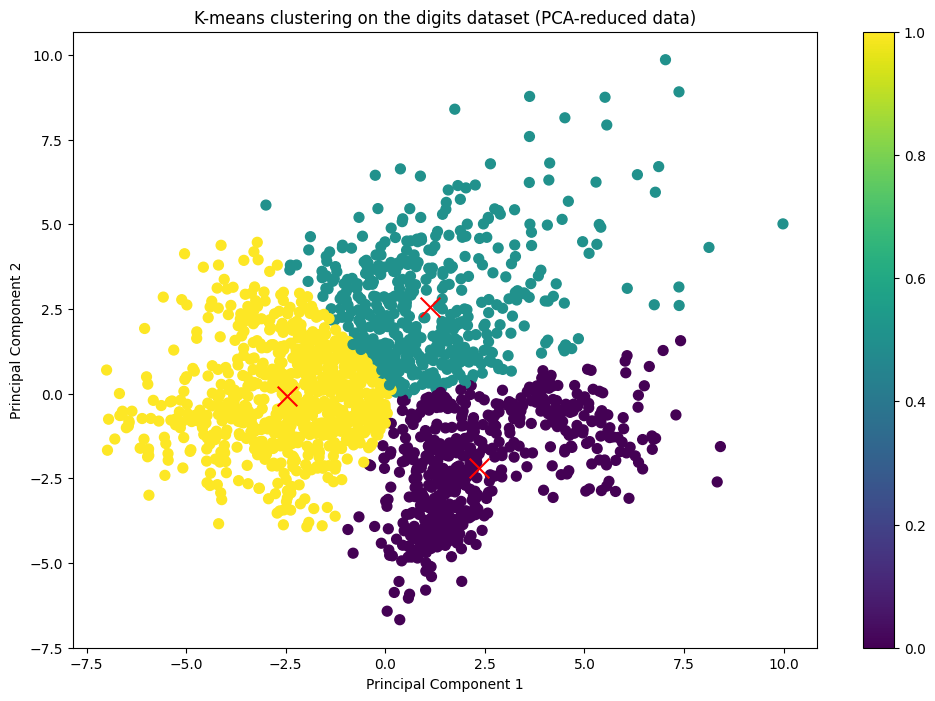

In [21]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

# MNIST 데이터셋 로드
digits = datasets.load_digits()

# 데이터 스케일링 (특성별로 정규화)
data = scale(digits.data)

# PCA를 사용하여 데이터를 2D로 축소
reduced_data = PCA(n_components=2).fit_transform(data)

# KMeans 클러스터링 모델 생성 및 훈련
# 여기에 코드 작성 #################################################
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(reduced_data)

####################################################################

# 클러스터링 결과 레이블
labels = kmeans.predict(reduced_data)

# 클러스터 중심 시각화
centroids = kmeans.cluster_centers_

# 클러스터링 결과 시각화
plt.figure(figsize=(12, 8))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, color='red')

# 제목 및 레이블 추가
plt.title('K-means clustering on the digits dataset (PCA-reduced data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()

# 결과 출력
plt.savefig('K-means clustering.jpg')
plt.show()
